import libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
songs = pd.read_csv('data/df_audio_features_5000.csv')
songs.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


preparing and preprocessing data

In [9]:
#display columns
songs.columns

#strip whitespace from column names as there are some whitespaces in the column names. 
# Whitespaces cause problems when I try to display the columns
songs.columns = songs.columns.str.strip()
songs.columns

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html'],
      dtype='object')

In [30]:

songs['name_artist_id'] = songs['name'] + ' - ' + songs['artist'] + ' - ' + songs['id']
songs.head(3)

#see alternative ways to combine columns in 1000 songs file

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,name_artist,name_artist_id
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.259,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,Se Eu Quiser Falar Com Deus ...,Se Eu Quiser Falar Com Deus ...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.399,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...,Saudade De Bahia ...,Saudade De Bahia ...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.730,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...,"Canta Canta, Minha Gente ...","Canta Canta, Minha Gente ..."


In [31]:
#filter out html, song_name, artist, id columns
filtered_songs = songs.drop(['html', 'name', 'artist', 'id', 'type'], axis=1)

#ALTERNATIVELY
# Filter out columns with object data type. But in this case we also lose the name_artist_id column
# filtered_songs = songs.select_dtypes(exclude=['object'])

# OR
# filtered_songs = songs.drop(['html', 'name', 'artist', 'id'], axis=1).select_dtypes(exclude=['object'])

filtered_songs.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,name_artist,name_artist_id
0,0.658,0.259,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4,Se Eu Quiser Falar Com Deus ...,Se Eu Quiser Falar Com Deus ...
1,0.742,0.399,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4,Saudade De Bahia ...,Saudade De Bahia ...
2,0.851,0.730,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4,"Canta Canta, Minha Gente ...","Canta Canta, Minha Gente ..."


In [32]:
#set the index to name_artist. Not name_artist_id like in 10_songs because I think it's easier to read and it is unique
filtered_songs.set_index('name_artist_id', inplace=True)
filtered_songs.sample(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,name_artist
name_artist_id,,,,,,,,,,,,,,
Symphony (feat. Zara Larsson) - Clean Bandit - 1x5sYLZiu9r5E43kMlt9f8,0.707,0.6290,0,-4.581,0,0.0563,0.2590,0.000016,0.138,0.457,122.863,212459,4,Symphony (feat. Zara Larsson) ...
Going to Georgia - The Mountain Goats - 4AlZ0FgehhgtLHddKx0Ou7,0.330,0.7560,0,-3.559,1,0.0368,0.0814,0.004530,0.153,0.582,128.951,201894,4,Going to Georgia ...
Let's Do It - Eartha Kitt - 67fFApZyHZ9LjsvkUQJShY,0.653,0.0518,8,-19.594,1,0.0359,0.8740,0.000002,0.242,0.426,96.591,185467,4,Let's Do It ...


<AxesSubplot:>

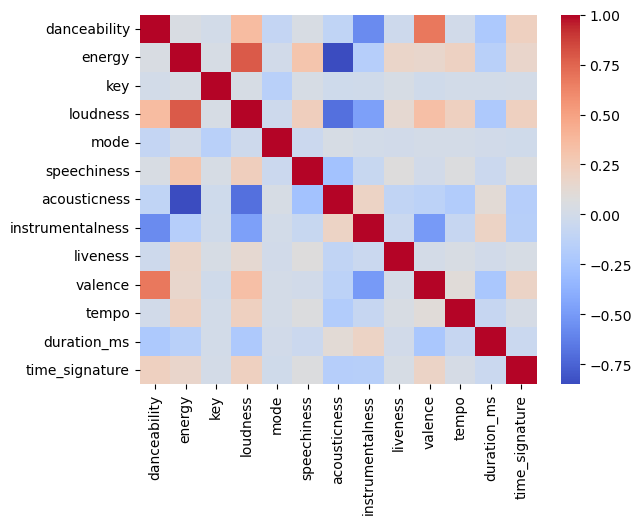

In [37]:
sns.heatmap(filtered_songs.corr(), cmap='coolwarm')

In [34]:
#shortened version of songs dataframe
songs_short = filtered_songs.drop(['time_signature', 'key', 'duration_ms'], axis=1)
songs_short.head(3)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,name_artist
name_artist_id,,,,,,,,,,,
Se Eu Quiser Falar Com Deus - Gilberto Gil - 1n7JnwviZ7zf0LR1tcGFq7,0.658,0.259,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,Se Eu Quiser Falar Com Deus ...
Saudade De Bahia - Antônio Carlos Jobim - 5QGM1U0eCYrQuwSJwTm5Zq,0.742,0.399,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,Saudade De Bahia ...
"Canta Canta, Minha Gente - Martinho Da Vila - 0NLIFSZxPzQhCwnkn5PJYs",0.851,0.730,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,"Canta Canta, Minha Gente ..."


<AxesSubplot:>

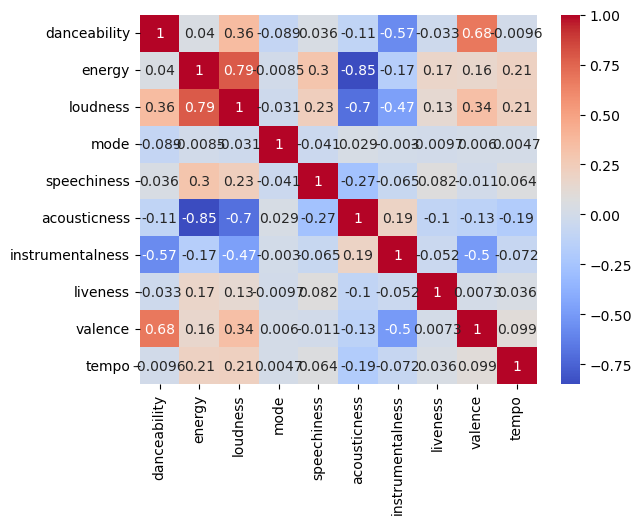

In [38]:
sns.heatmap(songs_short.corr(), annot=True, cmap='coolwarm')

MODELLING. Data scaling

In [20]:
#preprocessing and scaling data for clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [25]:
# MinMaxScaler
songs_minmax = MinMaxScaler().fit_transform(songs_short)
songs_minmax = pd.DataFrame(songs_minmax, columns=songs_short.columns, index=songs_short.index)
songs_minmax.head(3)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name_artist,,,,,,,,,,
Se Eu Quiser Falar Com Deus - Gilberto Gil,0.680455,0.259,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800
Saudade De Bahia - Antônio Carlos Jobim,0.767322,0.399,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322
"Canta Canta, Minha Gente - Martinho Da Vila",0.880041,0.730,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862


In [27]:
# StandardScaler
songs_standard = StandardScaler().fit_transform(songs_short)
songs_standard = pd.DataFrame(songs_standard, columns=songs_short.columns, index=songs_short.index)
songs_standard.head(3)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name_artist,,,,,,,,,,
Se Eu Quiser Falar Com Deus - Gilberto Gil,0.681116,-1.368556,-0.604187,-1.351545,-0.178099,1.134867,-0.694125,5.285610,-0.495488,-0.292147
Saudade De Bahia - Antônio Carlos Jobim,1.066401,-0.882963,-0.525544,0.739894,-0.682409,-0.205206,-0.694278,-0.524470,0.898109,0.221160
"Canta Canta, Minha Gente - Martinho Da Vila",1.566355,0.265117,-0.271661,0.739894,3.706071,0.457807,-0.694112,-0.410678,1.661526,-0.875994


Modelling. KMeans

In [28]:
from sklearn.cluster import KMeans

<AxesSubplot:xlabel='danceability', ylabel='energy'>

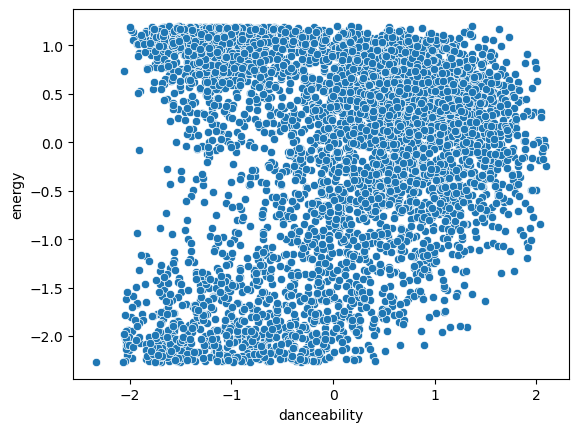

In [29]:
sns.scatterplot(data=songs_standard, x='danceability', y='energy')

In [48]:
songs_kmeans = KMeans(n_clusters=5, random_state=42).fit(songs_standard)
songs_kmeans

KMeans(n_clusters=5, random_state=42)

In [ ]:
# sns.scatterplot(data=songs_short, x='danceability', y='liveness', hue='cluster', palette='Set2')
# sns.scatterplot(data=centroids, x='danceability', y='liveness', color='red', s=150)
# plt.show()